# Using convolution neural network to classify fruits
This is **Part 2** of the fruit classification project. In [**Part 1**](https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-1-getting-data-ready) we split the data into training, validation and test sets. We saved these folders in zip format. In this part we will use the split data to calculate certain parameters that will be used in building the convolution neural network. We will also visually analyze the number of images in different classes and build an interactive plot to explore fruit images in the test data. 

## Importing required packages
Firstly, lets import the packages that we will be using. The particular use of every package is shown in the comments.

In [1]:
%matplotlib inline

import os, shutil # directory operations
import numpy as np # linear algebra 
import pandas as pd # I/O of data
from zipfile import ZipFile # woking with zip archives

# packages for visualization
import ipywidgets as iw
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from skimage.transform import resize as imresize

## Extracting zipped files
We need to extract the images from test, training and validation sets.

We make a list with names of zip folders.

In [2]:
zp_filenames = ['Testing.zip','Training.zip','Validation.zip']

Using this list, we make a list of zip folders names including their path.

In [3]:
# using list comprehension to build a list for zipped file with their path names.
zp_filenamesWithpath = [os.path.join('../input/kaggle-for-deep-learning-p-1-getting-data-ready',k) for k in zp_filenames] 

Now, we extract the files in zipped folders to this directory.

In [4]:
for k in zp_filenamesWithpath: # looping over the files that need to be unzipped
    
    # extracting the zipfiles to the current directory
    with ZipFile(k,'r') as zp: 
        zp.extractall()

## Visualizing fruits
We will use matplotlib.pyplot along with ipywidgets and display packages to make an interactive plot to visualize different fruits in the test set. 

In [5]:
f_names = [k for k in os.listdir('working/Training')] # list of fruit names

dp = iw.Dropdown(options = f_names, 
                 description = 'Select fruit') # creating a dropdown widgets for fruit names

path4 = '../input/fruits/fruits-360_dataset/fruits-360/Training' # path to training images

# displaying the dropdown widget
display(dp)
out = iw.Output()
display(out)

# defining a function which is activated when the drop down value is changed
def on_index_change(change):
    
    out.clear_output() # first let's clear the output if there is any
    
    f_dir = f_names[change.new] # assigning the new fruit name to f_dir
    
    num_imgs = len(os.listdir(os.path.join(path4, f_dir))) - 1 # calculating the number of images in the new fruit directory 
    path2image = os.path.join(path4, f_dir) # getting the path to the new fruit directory
    
    # defining a function which will be used for the slider widget. This function shows an image based on scroll value.
    def showfruit(vchange):
        
        fig = plt.figure(figsize = (5, 5)) # initializing the figure
        
        im2show = os.listdir(path2image)[vchange] # storing the name of image to be shown
        path5 = os.path.join(path2image,im2show) # storing the complete path to the image to be shown
        
        img = plt.imread(path5) # reading the image to be shown
        
        plt.imshow(img) # displaying the image
        plt.axis('off') # turning the axis off
    
    # making a slider widget which uses the function showfruit to plot fruit images
    with out:
        k = iw.interactive(showfruit, vchange =  iw.IntSlider(description = 'Scroll images',
                                                              min = 0,
                                                              max = num_imgs,
                                                              readout = False))
        
        # displaying the slider widget
        display(k)

# observing if there is a change to the dropdown widget index
dp.observe(on_index_change, names='index')

A Jupyter Widget

A Jupyter Widget

As shown in the above interactive widget, we can explore any image in any class. This helps us to get a sense of the input data.

**THE WIDGET USES DATASET FROM KAGGLE, THEREFORE ONLY WORKS IN A KAGGLE KERNEL. **Because of this the code below shows one image of each fruit.

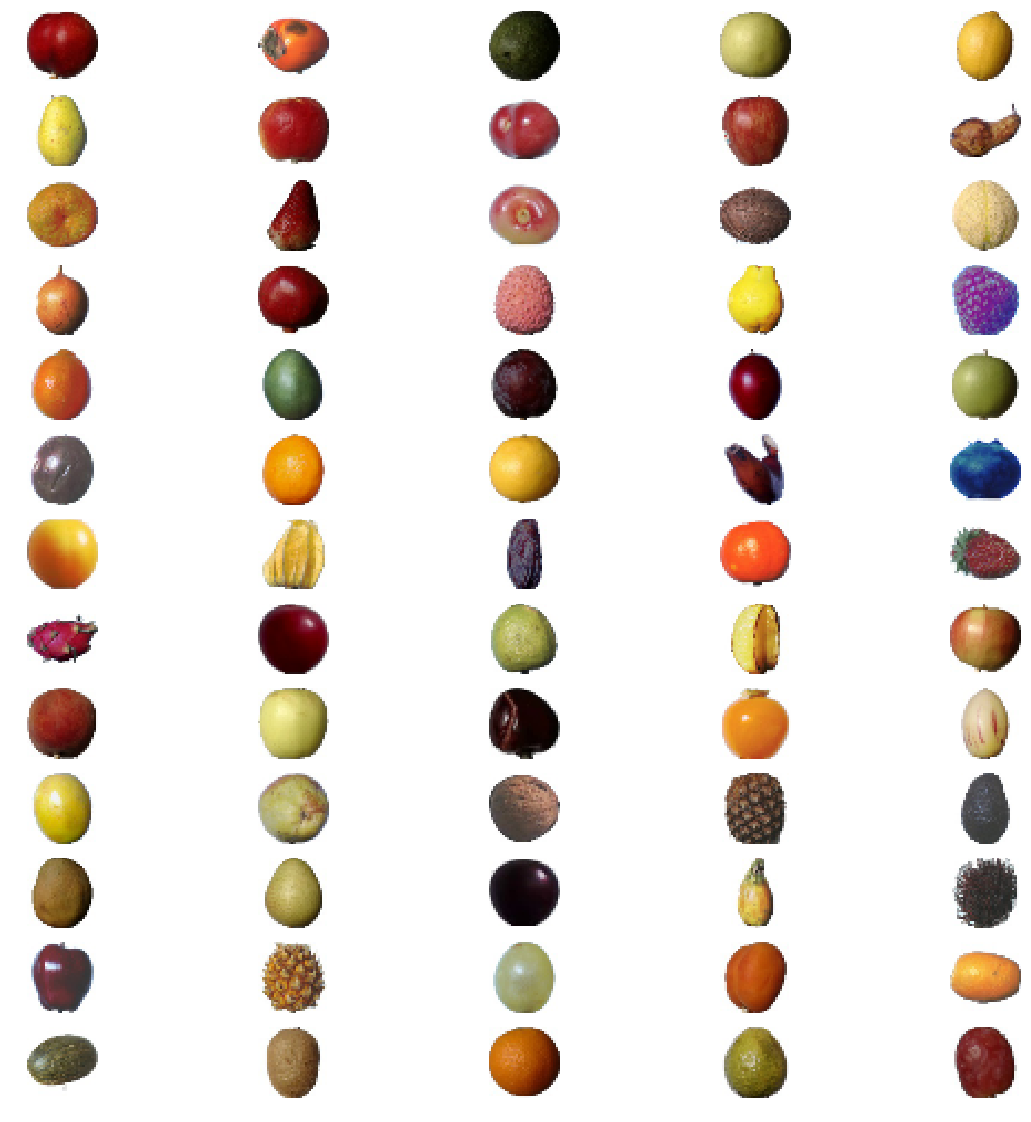

In [6]:
# initializing an array to store resized images
imgs = np.empty([75,32,32,3])

# looping over folders in the training directory
for i, folder in enumerate(os.listdir(path4)):
    
    # selecting first image in the folder
    first_image = (os.listdir(os.path.join(path4,folder)))[0]
    
    # reading the image
    img = plt.imread(os.path.join(path4,folder + '/' + first_image))
    
    # resizing the image
    imgs[i,:,:,:] = imresize(img, (32, 32, 3), mode = 'constant')

# creating 75 subplots with 13 rows and 5 columns
figure, ax = plt.subplots(13,5,figsize = (20, 20))

# initializing count variable i

i = 0

# looping over subplot rows
for k in range(13):
    
    # looping over subplot columns
    for j in range(5):
        # plotting image
        ax[k,j].imshow(imgs[i])
        
        #turning axis off
        ax[k,j].axis('off')
        
        # updating count variable
        i += 1

## Calculating parameters to use in building the convolution neural network
When we build the convolution neural network and fit it, batches of images will go as input to the network. We need to calculate the number of images in a batch for different sets. Along with the number of images in a batch, we also need to calculate 'steps per epoch'. This number should be 'total number of images in a set / number of images in a batch'. Lastly, the output of the last layer needs to be calculated. This should equal the number of classes. In summary, we need to calculate the following:
* Number of images in a batch for training and validation set,
* Numer of steps per epoch for training and validation set,
* Number of classes to be used as the output of the last layer.

To calculate the different parameters, lets first find the names of different fruits.

In [7]:
path1 = 'working/Training' # path to the training folder where folders with fruit names are stored
path2 = 'working/Validation' # path to the validation folder where folders with fruit names are stored
path3 = 'working/Test' # path to the test folder where folders with fruit names are stored
f_names = [k for k in os.listdir(path1)] # list of fruit names

Now, we will use the list of fruit names as keys for a dictionary in which we will store the number of images in each class for each set.

In [8]:
# initializing empty dictionaries to contain number of fruits
count_train = {}
count_test = {}
count_validation = {}
count_total = {}

# looping over the list of fruit names
for k in f_names:
    
    # storing the number of images in each class to different folders
    count_train[k] = len(os.listdir(os.path.join(path1,k)))
    count_test[k] = len(os.listdir(os.path.join('working/Test',k)))
    count_validation[k] = len(os.listdir(os.path.join('working/Validation',k)))

# Assigning the number of fruits in different sets to one dictionary
count_total['Test'] = count_test
count_total['Training'] = count_train
count_total['Validation'] = count_validation

# Storing the dictionary to a data frame, df
df = pd.DataFrame.from_dict(count_total)

Before moving on, let's explore the head of the dataframe first. 

In [9]:
df.head()

,Test,Training,Validation
Apple Braeburn,41,492,123
Apple Golden 1,41,492,123
Apple Golden 2,41,492,123
Apple Golden 3,40,481,121
Apple Granny Smith,41,492,123


The dataframe shows that if we sum columns we will get the total number of images in each set. Also, if we calculate the number of rows of the data frame, it should be equal to the number of classes. Let's calculate the total number of images in each set and number of classes, and store the values in a dictionary.

In [10]:
# Calculating the number of images in each set and the number of classes. Storing these values in a dictionary
cnn_params = {}
cnn_params['No training images'] = np.sum(df.Training)
cnn_params['No validation images'] = np.sum(df.Validation)
cnn_params['No test images'] = np.sum(df.Test)
cnn_params['No classes'] = len(df.Test)

# Printing the number of images in each set and the number of classes.
print('Number of training images = {} \n'.format(cnn_params['No training images']))
print('Number of validation images = {} \n'.format(cnn_params['No validation images']))
print('Number of test images = {} \n'.format(cnn_params['No test images']))
print('Number of classes = {} \n'.format(cnn_params['No classes']))

Number of training images = 37836 

Number of validation images = 9554 

Number of test images = 3155 

Number of classes = 75 



 Now we will divide the images in training and validation set to a certain number of batches. The number of batches we will search for are values between 8 and 64. For every set we need to find the batch size such that images can be evenly divided into different batches.

In [11]:
# batch sizes to search from
potential_batch_sizes = [k for k in range(8,129)]

# dividing the total number of images by potential_batch_sizes are calculating the remainder
remaining_images_training = list(zip(potential_batch_sizes, cnn_params['No training images']%potential_batch_sizes))
remaining_images_validation = list(zip(potential_batch_sizes, cnn_params['No validation images']%potential_batch_sizes))

# printing the potential_batch_sizes with their respective remainders
print('Batch size and corresponding remaining training images :\n {}'.
      format(remaining_images_training)) 
print('Batch size and corresponding remaining validation images :\n {}'.
      format(remaining_images_validation)) 

Batch size and corresponding remaining training images :
 [(8, 4), (9, 0), (10, 6), (11, 7), (12, 0), (13, 6), (14, 8), (15, 6), (16, 12), (17, 11), (18, 0), (19, 7), (20, 16), (21, 15), (22, 18), (23, 1), (24, 12), (25, 11), (26, 6), (27, 9), (28, 8), (29, 20), (30, 6), (31, 16), (32, 12), (33, 18), (34, 28), (35, 1), (36, 0), (37, 22), (38, 26), (39, 6), (40, 36), (41, 34), (42, 36), (43, 39), (44, 40), (45, 36), (46, 24), (47, 1), (48, 12), (49, 8), (50, 36), (51, 45), (52, 32), (53, 47), (54, 36), (55, 51), (56, 36), (57, 45), (58, 20), (59, 17), (60, 36), (61, 16), (62, 16), (63, 36), (64, 12), (65, 6), (66, 18), (67, 48), (68, 28), (69, 24), (70, 36), (71, 64), (72, 36), (73, 22), (74, 22), (75, 36), (76, 64), (77, 29), (78, 6), (79, 74), (80, 76), (81, 9), (82, 34), (83, 71), (84, 36), (85, 11), (86, 82), (87, 78), (88, 84), (89, 11), (90, 36), (91, 71), (92, 24), (93, 78), (94, 48), (95, 26), (96, 12), (97, 6), (98, 8), (99, 18), (100, 36), (101, 62), (102, 96), (103, 35), (104

Based on the results printed above, we can use the number of batches for training and validation sets = 18 and 17 respectively. Let's store the batch number to the dictionary cnn_params.

In [12]:
cnn_params['Training batch size'] = 18
cnn_params['Validation batch size'] = 17

Steps per epoch should be equal to 'total number of images in a set / batch size for that set'. Lets calculate steps per epoch and store them to cnn_params.

In [13]:
cnn_params['Training steps/epoch'] = int(cnn_params['No training images'] / cnn_params['Training batch size'])
cnn_params['Validation steps/epoch'] = int(cnn_params['No validation images'] / cnn_params['Validation batch size'])

Finaly, we will convert the dictionary cnn_params to a dataframe and save it as '.csv' file. We will use this data in the next part of this project when we build the convolution neural network.

In [14]:
# Storing the dictionary to a data frame, cnn_params
df_cnn_params = pd.DataFrame.from_dict(cnn_params, orient='index')
df_cnn_params.to_csv('CNNParameters.csv')

## Exploratory analysis of the data
In the last step of this part of the project, we will perform some visual exploratory analysis. We will make bar plots of the number of fruits in each class for each set. 

First, we plot the number of fruits in each class for the training set.

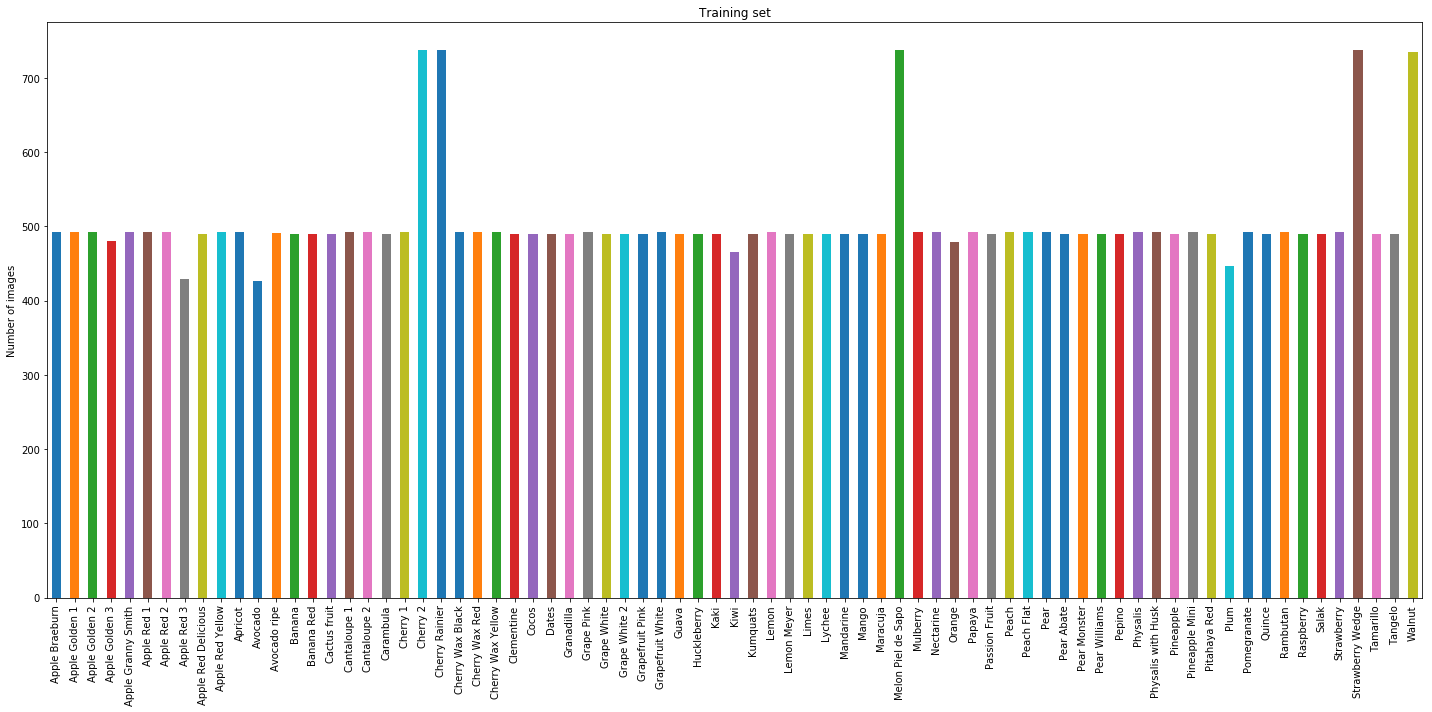

In [15]:
# making the bar plot
df['Training'].plot(kind='bar', figsize=(20, 10), legend=False)

# labeling the axis and setting a title
plt.ylabel('Number of images')
plt.title('Training set')
plt.tight_layout()

The figure shows that in the training set there are approximately 500 images for each class with a few exceptions. 

Next, we plot the number of fruits in each class for the validation set.

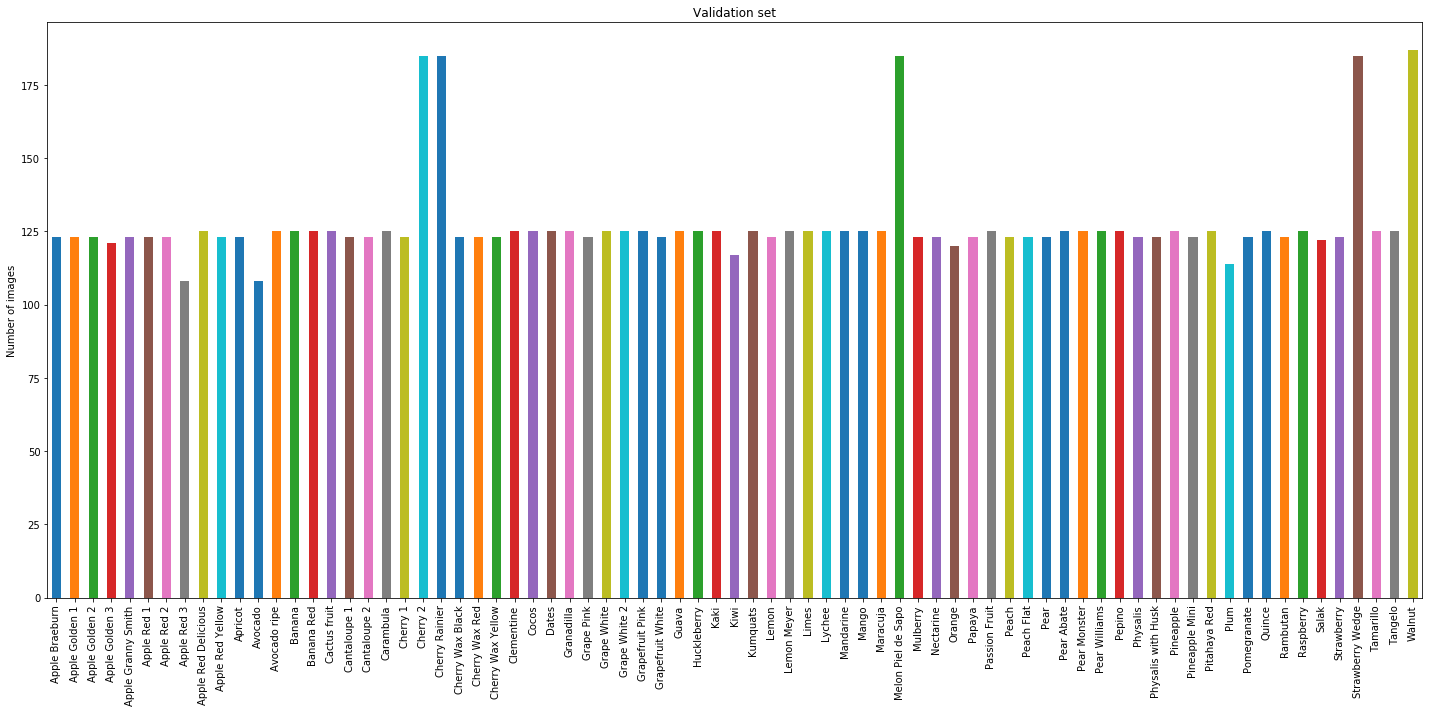

In [16]:
# making the bar plot
df['Validation'].plot(kind='bar', figsize=(20, 10), legend=False)

# labeling the axis and setting a title
plt.ylabel('Number of images')
plt.title('Validation set')
plt.tight_layout()

The figure shows that in the validation set there are approximately 125 images for each class. Similar to the training set there are a few exceptions.

Next, we plot the number of fruits in each class for the test set.

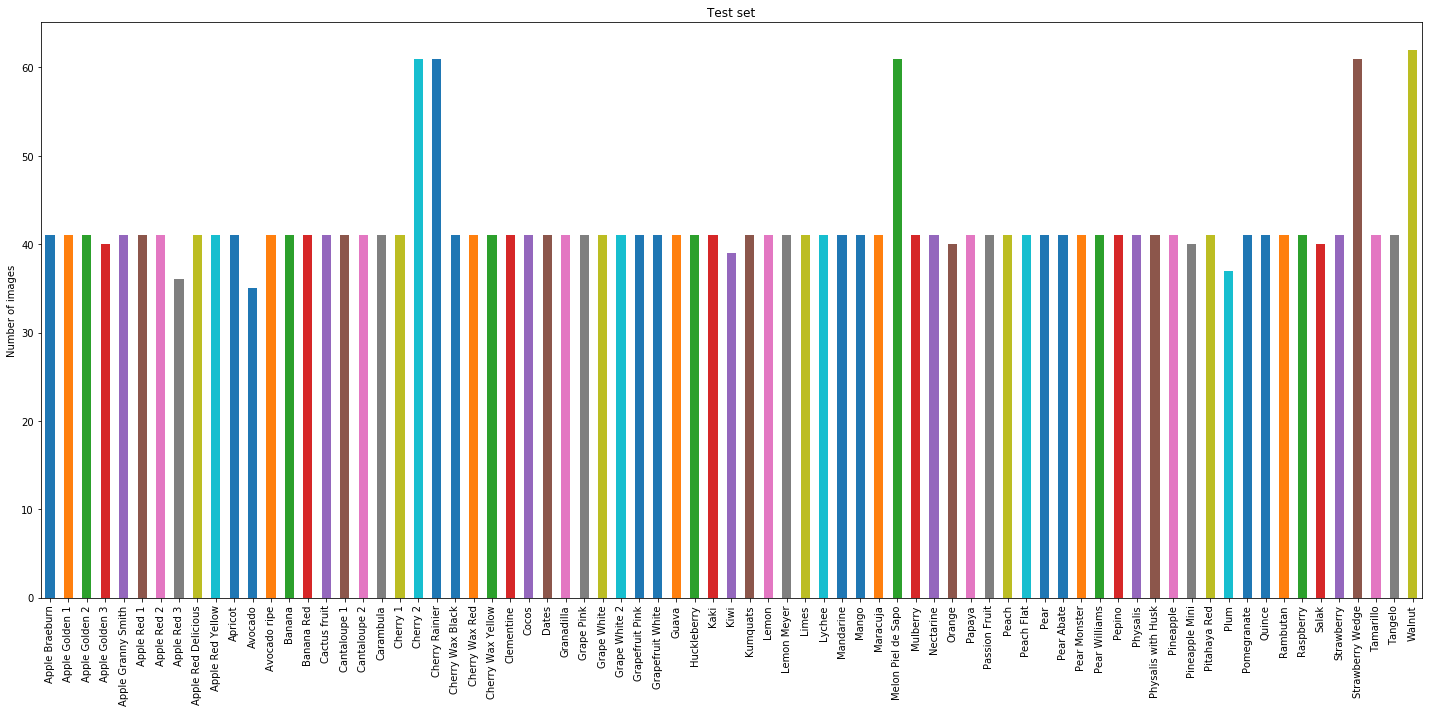

In [17]:
# making the bar plot
df['Test'].plot(kind='bar', figsize=(20, 10), legend=False)

# labeling the axis and setting a title
plt.ylabel('Number of images')
plt.title('Test set')
plt.tight_layout()

The figure shows that in the training set there are approximately 40 images for each class. Similar to the training and validation set there are a few exceptions.

Finally,  we remove the extracted images from the working directory.

In [18]:
# Removing extracted images folders
shutil.rmtree('working')

## Summary
In this part of the project we completed a few important steps:
* We have calculated the parameters values that will be used in the next part, where we will build the convolution neural network.
* We have performed some informative visualizations:
    
 * We plotted the number of images in each class for each set.
 * We also created an interactive visual that let's us explore fruit images in each class. 
      
In the next part we will use the split sets (from part 1)and parameters values that we calculated and stored in this part to build the convolution neural network. Also, we will use the same code to extract zipped files that we used in this part.